In [1]:
import os
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [8]:
dataset_path = "C:/Users/user/Downloads/archive (4)/Voice of Birds/Voice of Birds"

In [9]:
class_folders = [os.path.join(dataset_path, folder) for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]


In [11]:
# Function to plot Mel Spectrogram
def plot_mel_spectrogram(audio_path, title):
    y, sr = librosa.load(audio_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [13]:
# Function to extract MFCC features
def extract_mfcc(audio_path, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)
    mfcc_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc_features

In [14]:
# Randomly select 5 audio files for Mel Spectrograms
mel_files = []
for folder in random.sample(class_folders, 5):  # Select 5 random classes
    files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.mp3')]
    if files:
        mel_files.append(random.choice(files))


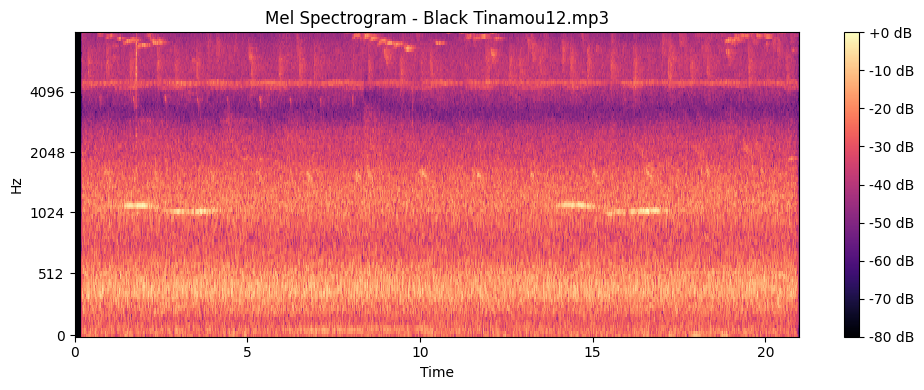

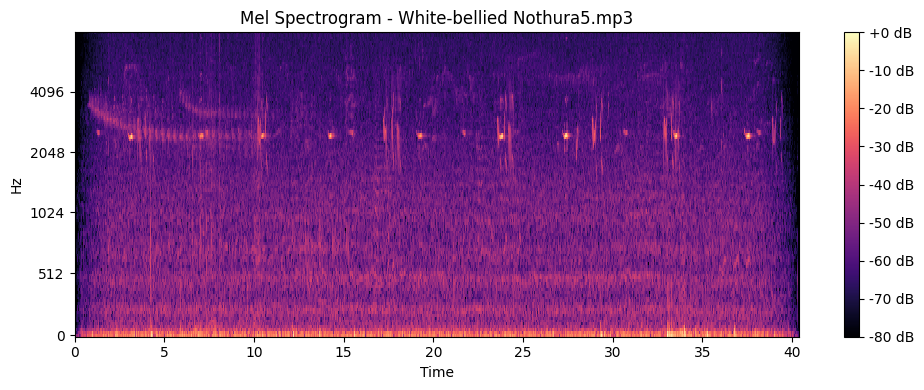

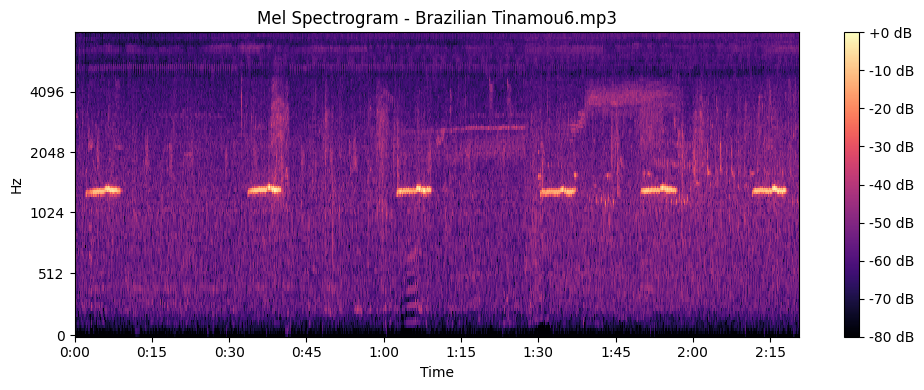

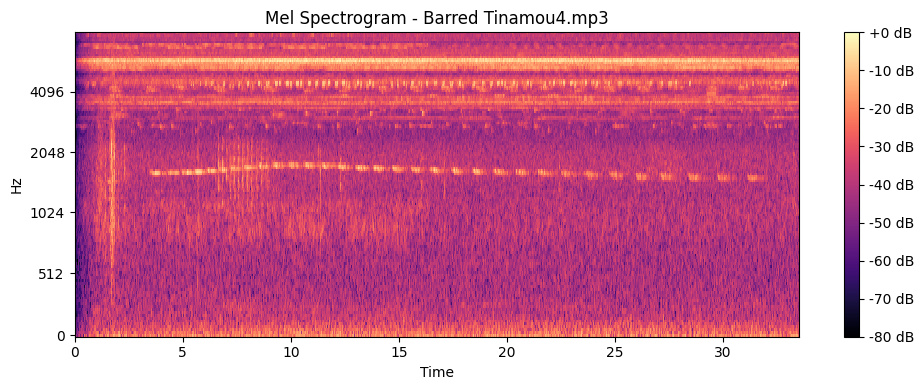

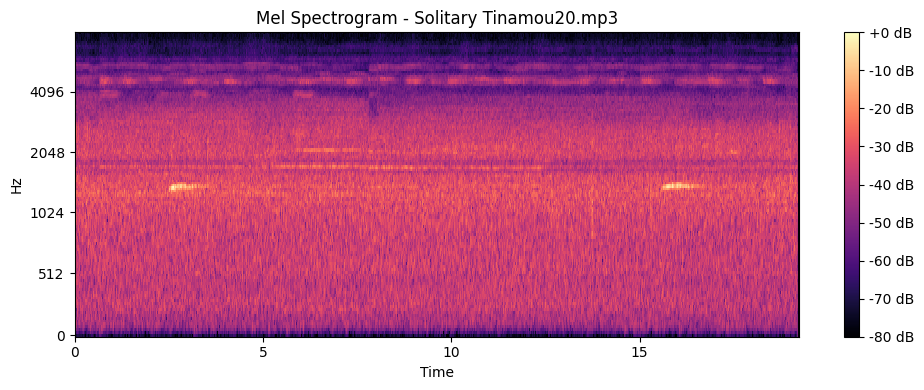

In [15]:
# Plot Mel Spectrograms for selected files
for audio_file in mel_files:
    plot_mel_spectrogram(audio_file, title=f"Mel Spectrogram - {os.path.basename(audio_file)}")

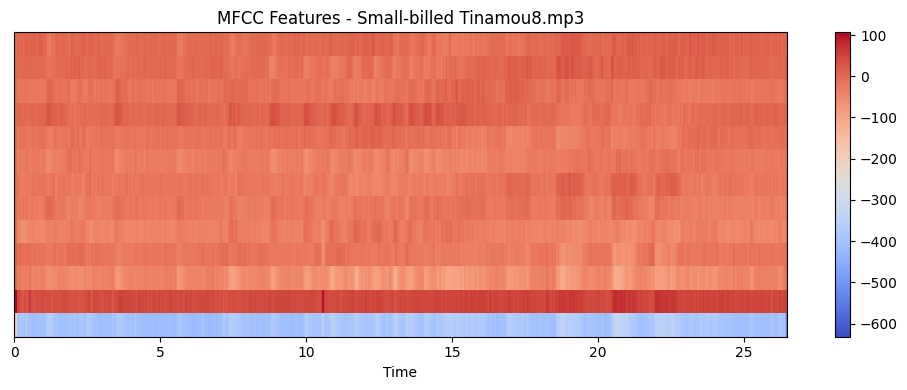

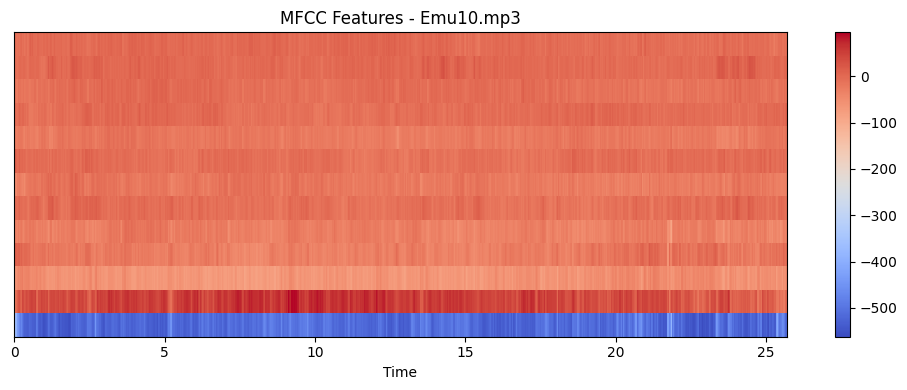

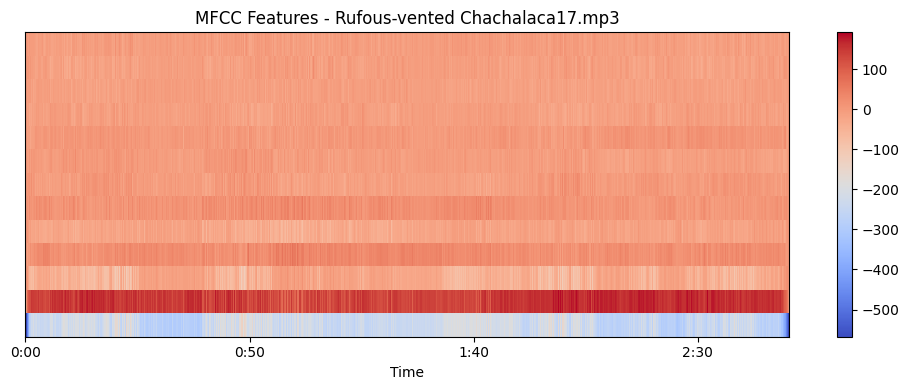

In [16]:
# Extract and plot MFCC features for one file per class
for folder in random.sample(class_folders, 3):  # Select 3 random classes for MFCC
    files = [os.path.join(folder, file) for file in os.listdir(folder) if file.endswith('.mp3')]
    if files:
        audio_file = random.choice(files)
        mfcc_features = extract_mfcc(audio_file)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_features, x_axis='time', sr=22050)
        plt.colorbar()
        plt.title(f"MFCC Features - {os.path.basename(audio_file)}")
        plt.tight_layout()
        plt.show()

In [17]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

In [18]:
# Initialize lists for features and labels
features = []
labels = []

In [19]:
# Function to extract features from audio
def extract_features(audio_path, sr=22050, n_mfcc=40):
    y, _ = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)  # Take the mean of MFCCs
    return mfcc_mean

In [20]:
# Iterate through all class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
for label, folder in enumerate(class_folders):
    folder_path = os.path.join(dataset_path, folder)
    audio_files = [file for file in os.listdir(folder_path) if file.endswith('.mp3')]
    for audio_file in audio_files:
        audio_path = os.path.join(folder_path, audio_file)
        try:
            features.append(extract_features(audio_path))  # Extract MFCC features
            labels.append(label)  # Assign class label
        except Exception as e:
            print(f"Error processing {audio_file}: {e}")


C:\Users\user\AppData\Local\Temp\ipykernel_2664\2449579832.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, _ = librosa.load(audio_path, sr=sr)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing Darwins Nothura21.mp3: 
Error processing Southern Cassowary2.mp3: 
Error processing Spotted Nothura2.mp3: 


In [22]:
# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [23]:
print (len(features))
print (len(labels))

2158
2158


In [24]:
print (features.shape)
print (labels.shape)

(2158, 40)
(2158,)


In [25]:
pip install imbalanced-learn 

Note: you may need to restart the kernel to use updated packages.
